In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum04/"

In [ ]:
df = pd.read_csv(path + "data/calonpembelimobil.csv", sep=",")

df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


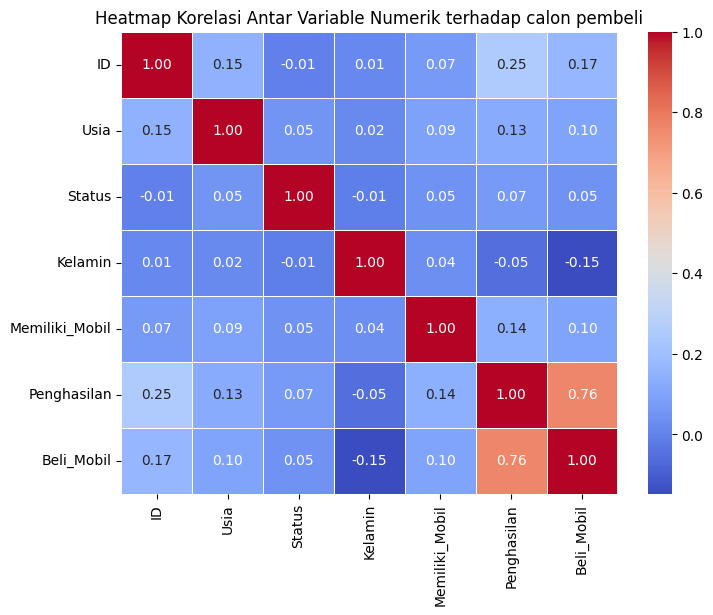

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variable Numerik terhadap calon pembeli', fontsize=12)
plt.show()

In [ ]:
X = df.drop(['ID', 'Beli_Mobil'], axis=1)
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 5)
Data uji: (200, 5)


In [ ]:
numeric_features = ['Usia', 'Penghasilan']
categorical_features = ['Status', 'Kelamin', 'Memiliki_Mobil']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

# Model Logistic Regression
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=42
)

# Pipeline
clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("☑ Model Logistic Regression berhasil dilatih.")

☑ Model Logistic Regression berhasil dilatih.


In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\n=== EVALUASI MODEL ===")
print(f"Akurasi    : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score   : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob):.4f}")


=== EVALUASI MODEL ===
Akurasi    : 0.9350
Precision  : 0.9672
Recall     : 0.9291
F1-Score   : 0.9478
ROC-AUC    : 0.9772


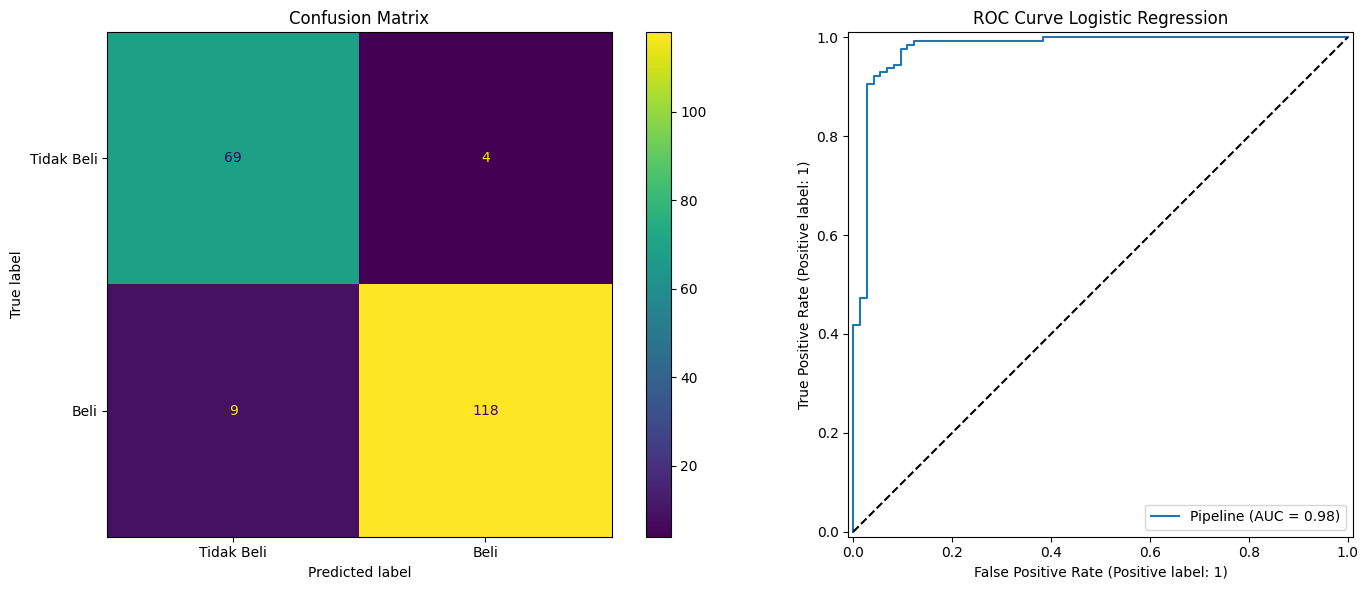

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                     display_labels=['Tidak Beli', 'Beli']).plot(ax=ax1, values_format='d')
ax1.set_title("Confusion Matrix")

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
ax2.set_title("ROC Curve Logistic Regression")
ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.tight_layout()
plt.show()

In [ ]:
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))


=== CLASSIFICATION REPORT ===
                precision    recall  f1-score   support

Tidak Beli (0)       0.88      0.95      0.91        73
      Beli (1)       0.97      0.93      0.95       127

      accuracy                           0.94       200
     macro avg       0.93      0.94      0.93       200
  weighted avg       0.94      0.94      0.94       200



In [ ]:
print("\n=== CROSS VALIDATION ===")
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Skor tiap fold:", scores)
print(f"Rata-rata akurasi: {np.mean(scores):.4f}")
print(f"Standar deviasi: {np.std(scores):.4f}")



=== CROSS VALIDATION ===
Skor tiap fold: [0.815 0.915 0.97  0.93  0.92 ]
Rata-rata akurasi: 0.9100
Standar deviasi: 0.0513


In [ ]:
feature_names = numeric_features + categorical_features
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feature_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

print("\n=== INTERPRETASI MODEL ===")
print(coef_df)


=== INTERPRETASI MODEL ===
            Fitur  Koefisien (log-odds)  Odds Ratio (e^coef)
1     Penghasilan              4.746019           115.125087
4  Memiliki_Mobil              0.127131             1.135566
0            Usia             -0.083314             0.920062
2          Status             -0.141676             0.867902
3         Kelamin             -1.132213             0.322319


In [ ]:
print("\n=== PREDIKSI DATA BARU ===")

# Contoh data baru
data_baru = pd.DataFrame({
    'Usia': [35, 28, 45],
    'Status': [2, 1, 3],
    'Kelamin': [1, 0, 1],
    'Memiliki_Mobil': [1, 0, 2],
    'Penghasilan': [300, 180, 400]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli'] = prob
hasil['Prediksi'] = pred
hasil['Prediksi_Label'] = hasil['Prediksi'].map({0: 'Tidak Beli', 1: 'Beli'})

print("Hasil Prediksi Data Baru:")
print(hasil)



=== PREDIKSI DATA BARU ===
Hasil Prediksi Data Baru:
   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Prob_Beli  Prediksi  \
0    35       2        1               1          300   0.966216         1   
1    28       1        0               0          180   0.186897         0   
2    45       3        1               2          400   0.999748         1   

  Prediksi_Label  
0           Beli  
1     Tidak Beli  
2           Beli  
